<a href="https://colab.research.google.com/github/ShaimaM/Intro_to_ML/blob/main/W2_D2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Assignment

1. Load in a sample of the NYC taxi dataset through this parquet link: `https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet`

In [1]:
import pandas as pd 

df=pd.read_parquet("https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-21 07:55:21,2019-12-21 08:00:18,1.0,1.20,1.0,N,148,4,2.0,6.5,2.5,0.5,0.00,0.0,0.3,9.80,2.5
1,1.0,2019-12-08 13:20:45,2019-12-08 13:28:32,1.0,1.10,1.0,N,113,90,1.0,7.0,2.5,0.5,3.00,0.0,0.3,13.30,2.5
2,2.0,2019-12-28 14:41:40,2019-12-28 14:52:29,1.0,1.12,1.0,N,186,137,2.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5
3,2.0,2019-12-05 23:42:35,2019-12-05 23:59:18,2.0,3.80,1.0,N,230,263,1.0,14.5,0.5,0.5,3.66,0.0,0.3,21.96,2.5
4,1.0,2019-12-13 12:30:25,2019-12-13 12:45:04,2.0,2.10,1.0,N,162,239,1.0,11.5,2.5,0.5,3.00,0.0,0.3,17.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482737,1.0,2019-12-12 15:22:02,2019-12-12 15:25:26,1.0,0.20,1.0,N,140,140,1.0,4.0,0.0,0.5,0.95,0.0,0.3,5.75,0.0
482738,1.0,2019-12-28 18:36:46,2019-12-28 18:44:33,1.0,1.80,1.0,N,263,75,2.0,8.0,2.5,0.5,0.00,0.0,0.3,11.30,2.5
482739,1.0,2019-12-07 19:58:00,2019-12-07 20:17:30,1.0,1.40,1.0,N,246,164,1.0,12.5,2.5,0.5,3.15,0.0,0.3,18.95,2.5
482740,2.0,2019-12-14 12:27:36,2019-12-14 12:43:30,1.0,5.58,1.0,N,170,88,1.0,18.5,0.0,0.5,4.36,0.0,0.3,26.16,2.5


2. Find out some information about the data...

In [2]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-21 07:55:21,2019-12-21 08:00:18,1.0,1.20,1.0,N,148,4,2.0,6.5,2.5,0.5,0.00,0.0,0.3,9.80,2.5
1,1.0,2019-12-08 13:20:45,2019-12-08 13:28:32,1.0,1.10,1.0,N,113,90,1.0,7.0,2.5,0.5,3.00,0.0,0.3,13.30,2.5
2,2.0,2019-12-28 14:41:40,2019-12-28 14:52:29,1.0,1.12,1.0,N,186,137,2.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5
3,2.0,2019-12-05 23:42:35,2019-12-05 23:59:18,2.0,3.80,1.0,N,230,263,1.0,14.5,0.5,0.5,3.66,0.0,0.3,21.96,2.5
4,1.0,2019-12-13 12:30:25,2019-12-13 12:45:04,2.0,2.10,1.0,N,162,239,1.0,11.5,2.5,0.5,3.00,0.0,0.3,17.80,2.5


In [3]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
482737,1.0,2019-12-12 15:22:02,2019-12-12 15:25:26,1.0,0.20,1.0,N,140,140,1.0,4.0,0.0,0.5,0.95,0.0,0.3,5.75,0.0
482738,1.0,2019-12-28 18:36:46,2019-12-28 18:44:33,1.0,1.80,1.0,N,263,75,2.0,8.0,2.5,0.5,0.00,0.0,0.3,11.30,2.5
482739,1.0,2019-12-07 19:58:00,2019-12-07 20:17:30,1.0,1.40,1.0,N,246,164,1.0,12.5,2.5,0.5,3.15,0.0,0.3,18.95,2.5
482740,2.0,2019-12-14 12:27:36,2019-12-14 12:43:30,1.0,5.58,1.0,N,170,88,1.0,18.5,0.0,0.5,4.36,0.0,0.3,26.16,2.5
482741,1.0,2019-12-24 22:50:46,2019-12-24 22:55:28,2.0,0.70,1.0,N,239,43,1.0,5.0,3.0,0.5,1.00,0.0,0.3,9.80,2.5


In [4]:
df.shape

(482742, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482742 entries, 0 to 482741
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               479098 non-null  float64
 1   tpep_pickup_datetime   482742 non-null  object 
 2   tpep_dropoff_datetime  482742 non-null  object 
 3   passenger_count        479098 non-null  float64
 4   trip_distance          482742 non-null  float64
 5   RatecodeID             479098 non-null  float64
 6   store_and_fwd_flag     479098 non-null  object 
 7   PULocationID           482742 non-null  int64  
 8   DOLocationID           482742 non-null  int64  
 9   payment_type           479098 non-null  float64
 10  fare_amount            482742 non-null  float64
 11  extra                  482742 non-null  float64
 12  mta_tax                482742 non-null  float64
 13  tip_amount             482742 non-null  float64
 14  tolls_amount           482742 non-nu

In [6]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,479098.000000,479098.000000,482742.000000,479098.000000,482742.000000,482742.000000,479098.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000
mean,1.666173,1.550393,2.977807,1.065156,163.502449,161.722570,1.298091,14.358827,1.110255,0.492481,2.245453,0.390203,0.298011,20.414273,2.275034
std,0.471579,1.174092,3.941160,0.903839,66.172609,70.222873,0.487450,573.620806,1.269991,0.071925,2.853395,1.699026,0.033592,573.684344,0.735852
min,1.000000,0.000000,-30.100000,1.000000,1.000000,1.000000,1.000000,-180.000000,-4.500000,-0.500000,-98.760000,-21.230000,-0.300000,-180.300000,-2.500000
25%,1.000000,1.000000,0.960000,1.000000,125.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.300000,2.500000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.920000,0.000000,0.300000,14.800000,2.500000
75%,2.000000,2.000000,3.020000,1.000000,233.000000,234.000000,2.000000,15.500000,2.500000,0.500000,3.000000,0.000000,0.300000,21.350000,2.500000
max,2.000000,9.000000,93.740000,99.000000,265.000000,265.000000,4.000000,398468.380000,90.060000,0.900000,225.000000,113.880000,0.300000,398471.200000,2.750000


In [7]:
df.nunique()

VendorID                      2
tpep_pickup_datetime     430916
tpep_dropoff_datetime    430729
passenger_count              10
trip_distance              3192
RatecodeID                    6
store_and_fwd_flag            2
PULocationID                248
DOLocationID                259
payment_type                  4
fare_amount                2053
extra                        25
mta_tax                       7
tip_amount                 1939
tolls_amount                268
improvement_surcharge         3
total_amount               5511
congestion_surcharge          5
dtype: int64

In [8]:
df.isnull().sum()

VendorID                 3644
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          3644
trip_distance               0
RatecodeID               3644
store_and_fwd_flag       3644
PULocationID                0
DOLocationID                0
payment_type             3644
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

3. Show me the relationships in your data... 
- corr
- pariplot
- some other visualization(s) (of your choice)

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [12]:
df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.165798,0.025826,0.009225,-0.006963,-0.002515,-0.012707,-0.001725,-0.858735,-0.028355,0.021642,0.010144,-0.039408,-0.001597,-0.009748
passenger_count,0.165798,1.000000,0.019496,0.000271,-0.006724,-0.004947,0.016564,-0.000294,-0.135692,0.002063,0.000780,0.012475,0.003783,-0.000227,0.013716
trip_distance,0.025826,0.019496,1.000000,0.144107,-0.094075,-0.105838,-0.020566,0.017337,-0.010598,-0.069476,0.524413,0.619455,0.018216,0.021595,-0.193941
RatecodeID,0.009225,0.000271,0.144107,1.000000,-0.008881,0.002503,0.006139,0.004868,-0.022093,-0.181959,0.133305,0.155296,-0.039509,0.005854,-0.094704
PULocationID,-0.006963,-0.006724,-0.094075,-0.008881,1.000000,0.106491,-0.028173,-0.000130,0.020532,0.004405,-0.030446,-0.048641,0.002988,-0.000290,0.123645
DOLocationID,-0.002515,-0.004947,-0.105838,0.002503,0.106491,1.000000,-0.029818,-0.000288,0.019605,0.024005,-0.036972,-0.064938,0.000169,-0.000520,0.123966
payment_type,-0.012707,0.016564,-0.020566,0.006139,-0.028173,-0.029818,1.000000,0.006944,-0.021476,-0.178163,-0.484442,-0.033897,-0.221938,0.004156,-0.175131
fare_amount,-0.001725,-0.000294,0.017337,0.004868,-0.000130,-0.000288,0.006944,1.000000,0.001263,-0.005854,0.011026,0.012538,-0.010388,0.999976,-0.003728
extra,-0.858735,-0.135692,-0.010598,-0.022093,0.020532,0.019605,-0.021476,0.001263,1.000000,0.089757,0.011126,-0.006051,0.064162,0.001905,0.187133
mta_tax,-0.028355,0.002063,-0.069476,-0.181959,0.004405,0.024005,-0.178163,-0.005854,0.089757,1.000000,-0.076968,-0.168556,0.790194,-0.005996,0.398662


In [13]:
#sns.pairplot(data= df);

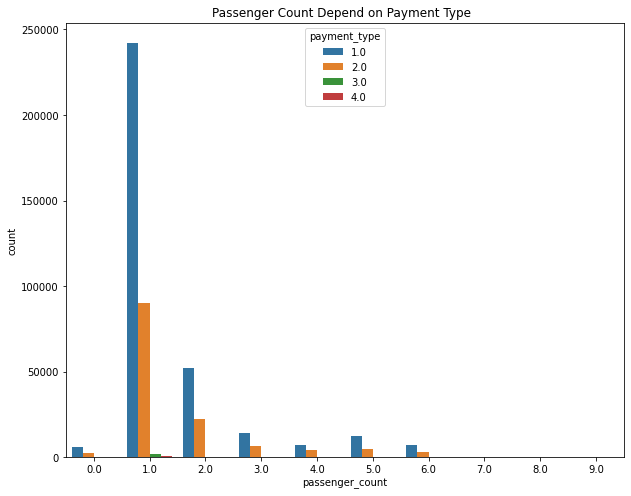

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='passenger_count', hue='payment_type').set_title("Passenger Count Depend on Payment Type  ");


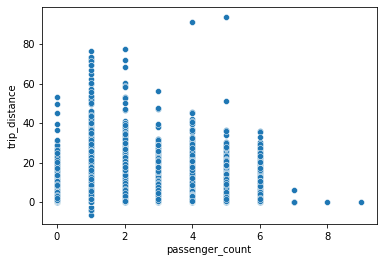

In [15]:
sns.scatterplot(data=df, x='passenger_count', y='trip_distance');

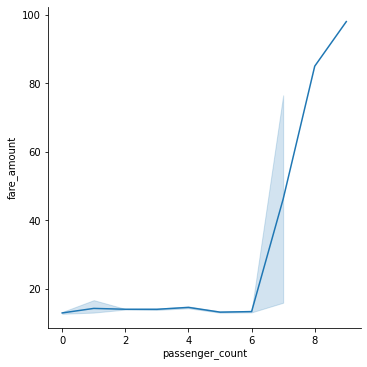

In [16]:
sns.relplot(data=df, kind="line",x="passenger_count", y="fare_amount");

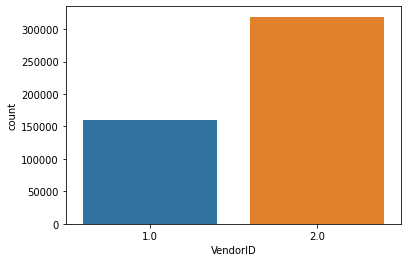

In [17]:
sns.countplot(data=df,x='VendorID');

4. Split your data into training and testing datasets...

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.fare_amount
y = df.total_amount

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

5. Import, create, and fit a LinearRegression model with 1 variable

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(pd.DataFrame(x_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

6. Make predictions on your `X_test` values...

In [22]:
predictions = lr.predict(pd.DataFrame(x_test))

In [23]:
# what do they look like? (show me some of the predictions)
predictions

array([17.55805941, 15.55794391, 23.05837705, ..., 15.55794391,
       24.05843481, 17.05803054])

7. Score your model...
- r2_score
- other metric (of your choice...)

In [24]:
from sklearn.metrics import *

r2_score(y_true=y_test, y_pred=predictions)

0.930458060299243

In [25]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=y_test, y_pred=predictions)

2.3152193338854303

In [26]:
max_error(y_true=y_test, y_pred=predictions)

239.24260473905997

In [27]:
y_test.mean()

19.43877972586453

In [28]:
mean_squared_error(y_true=y_test, y_pred=predictions)

16.29658881171901

In [29]:
y_test.std()

15.308282377225481

8. Create, and fit a LinearRegression model with **more than** 1 variable

In [30]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-21 07:55:21,2019-12-21 08:00:18,1.0,1.20,1.0,N,148,4,2.0,6.5,2.5,0.5,0.00,0.0,0.3,9.80,2.5
1,1.0,2019-12-08 13:20:45,2019-12-08 13:28:32,1.0,1.10,1.0,N,113,90,1.0,7.0,2.5,0.5,3.00,0.0,0.3,13.30,2.5
2,2.0,2019-12-28 14:41:40,2019-12-28 14:52:29,1.0,1.12,1.0,N,186,137,2.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5
3,2.0,2019-12-05 23:42:35,2019-12-05 23:59:18,2.0,3.80,1.0,N,230,263,1.0,14.5,0.5,0.5,3.66,0.0,0.3,21.96,2.5
4,1.0,2019-12-13 12:30:25,2019-12-13 12:45:04,2.0,2.10,1.0,N,162,239,1.0,11.5,2.5,0.5,3.00,0.0,0.3,17.80,2.5


In [31]:
x = df[['trip_distance','fare_amount','extra','tip_amount', 'tolls_amount']]
y = df.total_amount

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [32]:
lr.fit(pd.DataFrame(x_train) , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

9. Make predictions on your `X_test` values...

In [33]:
predictions = lr.predict(pd.DataFrame(x_test))

In [34]:
# what do they look like? (show me some of the predictions)
predictions

array([11.02017929, 25.84815559, 17.00457485, ..., 15.78180343,
       32.54414972, 26.08112443])

10. Score your model...
- r2_score
- other metric (of your choice...)

In [35]:
r2_score(y_true=y_test, y_pred=predictions)

0.9969282650587493

In [36]:
mean_absolute_error(y_true=y_test, y_pred=predictions)

0.5550481001985333

In [37]:
max_error(y_true=y_test, y_pred=predictions)

9.680070666006564

In [38]:
y_test.mean()

19.44318019897322

In [40]:
y_test.std()

15.363063777728469

11. Which model is better? Why?


**The Second Model Is Better, Because The ```r2_score``` Is Higher Than The First, And Also Has A Lower ```mean_absolute_error``` And ```max_error```.**

12. Perform GridSearchCV with the better data

In [41]:
from sklearn.model_selection import GridSearchCV

p_grid = {'fit_intercept': [True, False],
          'normalize': [True, False]}

grid = GridSearchCV(lr, p_grid)

In [42]:
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
grid.best_params_

{'fit_intercept': True, 'normalize': True}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [55]:
lr = LinearRegression(
                      fit_intercept=True,
                      normalize=True
                      )

In [56]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [57]:
grid.best_params_

{'fit_intercept': True, 'normalize': True}

In [58]:
predictions = lr.predict(x_test)

14. Score the new model... 
- r2_score
- some other metric of your choice

In [59]:
r2_score(y_true=y_test, y_pred=predictions)

0.9969282650587493

In [60]:
mean_absolute_error(y_true=y_test, y_pred=predictions)

0.555048100198409

In [61]:
max_error(y_true=y_test, y_pred=predictions)

9.680070666007573

In [62]:
y_test.mean()

19.44318019897322

In [63]:
mean_squared_error(y_true=y_test, y_pred=predictions)

0.7249972900264144

In [64]:
y_test.std()

15.363063777728469

Did the score change at all? Why?

**No ,The result didn't Change From The Output That I Obtained From The Second Model**
**Because The ```GridSearchCV``` is Used to Improve The Accuracy Of Model , And That's Means  The Results Of The Second Model Are Correct**